## Analyse de l’usage des machines


=== Moyenne de cycles par heure ===
      laverie  hour  cycles
0   Laverie 1     0       6
1   Laverie 1     1       2
2   Laverie 1     2       1
3   Laverie 1     5      36
4   Laverie 1     6     216
5   Laverie 1     7     418
6   Laverie 1     8     998
7   Laverie 1     9    1761
8   Laverie 1    10    2449
9   Laverie 1    11    2111
10  Laverie 1    12    1603
11  Laverie 1    13    1671
12  Laverie 1    14    2073
13  Laverie 1    15    2164
14  Laverie 1    16    1896
15  Laverie 1    17    1703
16  Laverie 1    18    1468
17  Laverie 1    19     804
18  Laverie 1    20     280
19  Laverie 1    21     155
20  Laverie 1    22      80
21  Laverie 1    23      23
22  Laverie 2     0       2
23  Laverie 2     6      21
24  Laverie 2     7     374
25  Laverie 2     8     976
26  Laverie 2     9    1476
27  Laverie 2    10    1877
28  Laverie 2    11    1804
29  Laverie 2    12    1782
30  Laverie 2    13    1771
31  Laverie 2    14    2038
32  Laverie 2    15    2097
33  Laverie

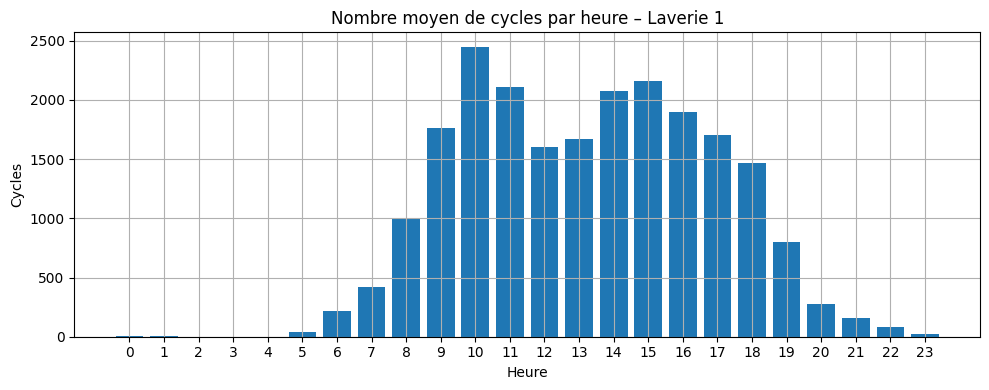

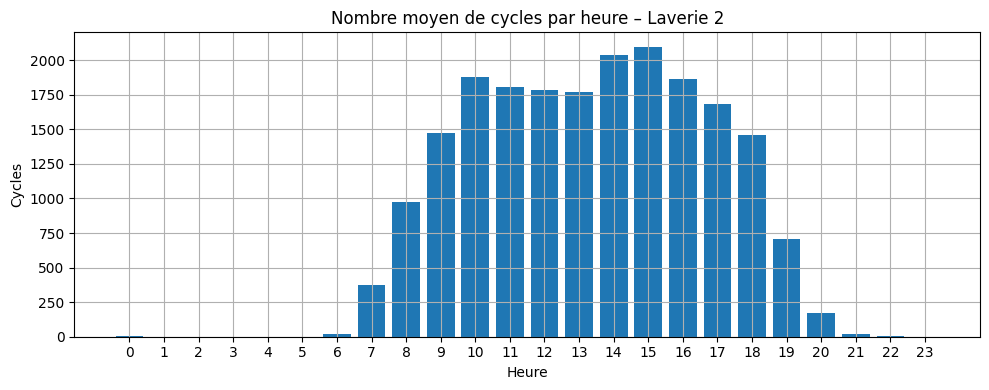

c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


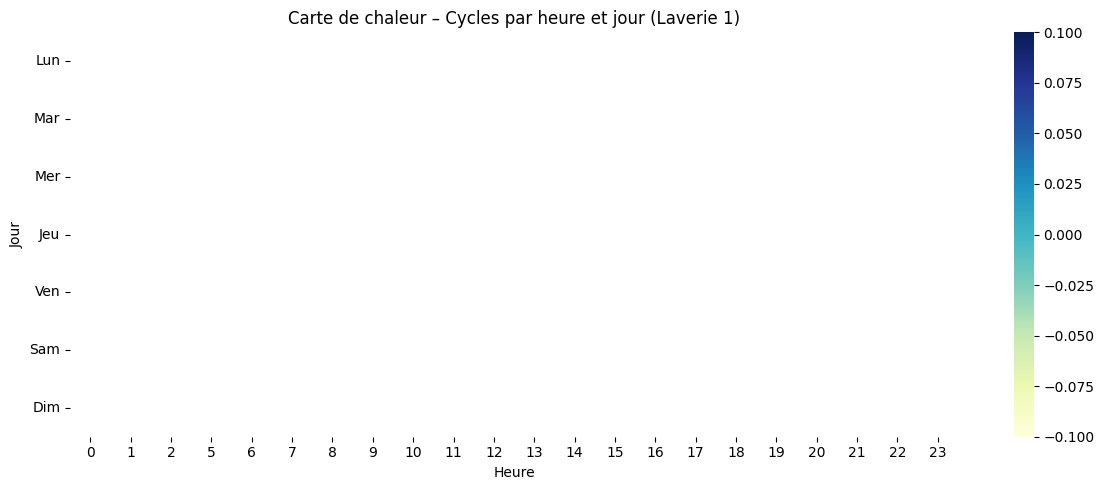

c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


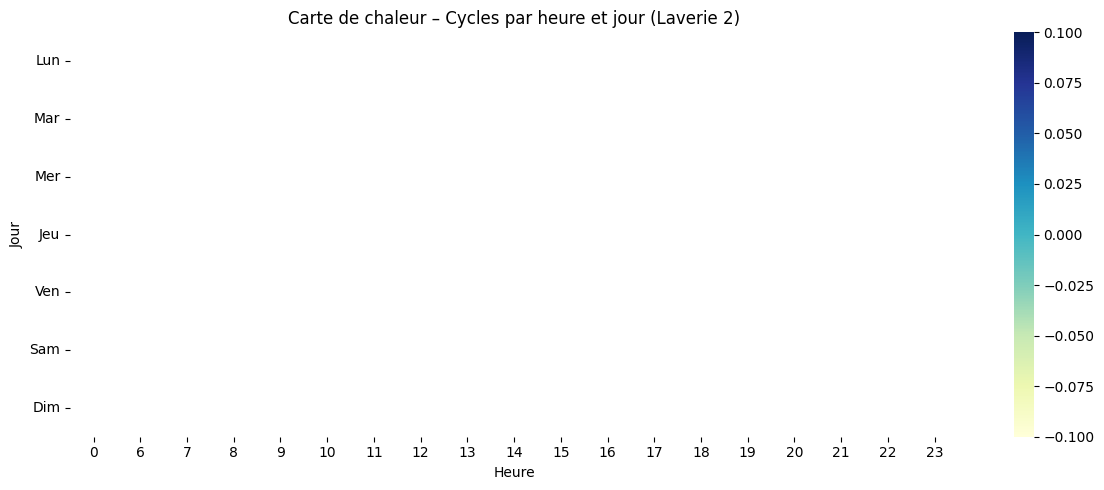


=== Statistiques clés par laverie ===
     laverie  total_cycles  heure_pic  jour_pic
0  Laverie 1         21918         10    Samedi
1  Laverie 2         20135         15  Dimanche


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 1. Chargement ----------
paths = {
    "Laverie 1": "../data_cleaned/laverie1/transactions_transaction_cleaned.csv",
    "Laverie 2": "../data_cleaned/laverie2/transactions_transaction_cleaned.csv",
}

frames = []
for laverie, path in paths.items():
    df = pd.read_csv(path)
    dt_col = [c for c in df.columns if "date" in c.lower() or "heure" in c.lower()][0]
    df[dt_col] = pd.to_datetime(df[dt_col])
    df["laverie"]   = laverie
    df["hour"]      = df[dt_col].dt.hour
    df["weekday"]   = df[dt_col].dt.day_name(locale="fr_FR")   # ex. 'lundi'
    df["weekday_num"] = df[dt_col].dt.weekday                 # 0=lundi
    frames.append(df)

data = pd.concat(frames, ignore_index=True)

# ---------- 2. Moyenne par heure ----------
hourly = (
    data.groupby(["laverie", "hour"])
        .size()
        .reset_index(name="cycles")
)
print("\n=== Moyenne de cycles par heure ===")
print(hourly)

# ---------- 3. Histogrammes ----------
for lav in hourly["laverie"].unique():
    subset = hourly[hourly["laverie"] == lav]
    plt.figure(figsize=(10, 4))
    plt.bar(subset["hour"], subset["cycles"])
    plt.title(f"Nombre moyen de cycles par heure – {lav}")
    plt.xlabel("Heure")
    plt.ylabel("Cycles")
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------- 4. Heatmaps jour × heure ----------
# ordre des jours en français
jours_ordre = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
jours_affiche = ["Lun", "Mar", "Mer", "Jeu", "Ven", "Sam", "Dim"]

for lav in data["laverie"].unique():
    subset = data[data["laverie"] == lav]

    pivot = (
        subset.groupby(["weekday", "hour"])
              .size()
              .unstack(fill_value=0)
              .reindex(index=jours_ordre)      # maintenant les bons labels
    )

    plt.figure(figsize=(12, 5))
    sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d")
    plt.title(f"Carte de chaleur – Cycles par heure et jour ({lav})")
    plt.yticks(ticks=[i + 0.5 for i in range(7)], labels=jours_affiche, rotation=0)
    plt.xlabel("Heure")
    plt.ylabel("Jour")
    plt.tight_layout()
    plt.show()

# ---------- 5. Statistiques clés ----------
stats = (
    data.groupby("laverie")
        .agg(
            total_cycles=("hour", "size"),                # on compte les lignes
            heure_pic=("hour", lambda x: x.value_counts().idxmax()),
            jour_pic=("weekday", lambda x: x.value_counts().idxmax())
        )
        .reset_index()
)
print("\n=== Statistiques clés par laverie ===")
print(stats)


## Analyse financière et comportement de paiement

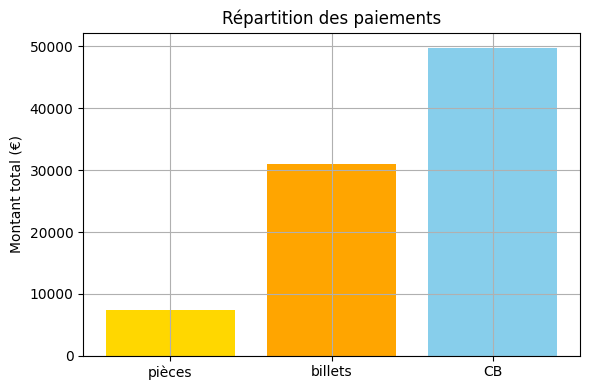


Répartition des paiements (en €) : {'pièces': np.float64(7346.0), 'billets': np.int64(31070), 'CB': np.float64(49704.3)}


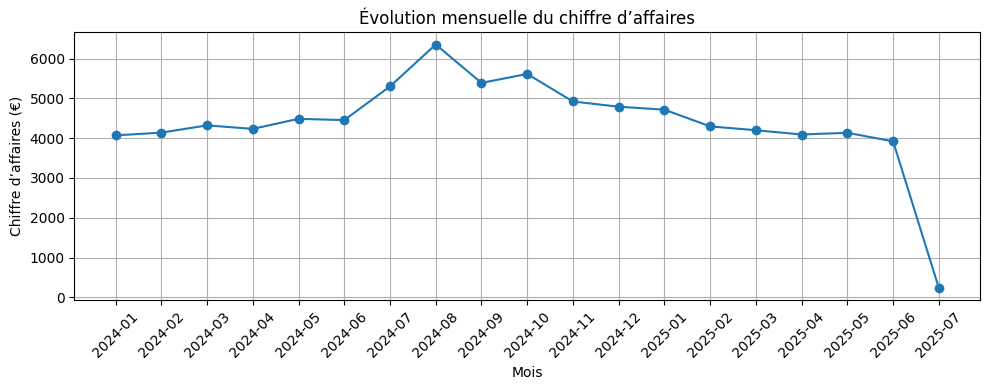


Chiffre d’affaires mensuel :
        mois  ca_tot
0   2024-01  4070.4
1   2024-02  4138.8
2   2024-03  4321.5
3   2024-04  4233.1
4   2024-05  4485.9
5   2024-06  4453.6
6   2024-07  5299.8
7   2024-08  6352.7
8   2024-09  5388.2
9   2024-10  5613.2
10  2024-11  4921.2
11  2024-12  4790.0
12  2025-01  4715.9
13  2025-02  4295.4
14  2025-03  4200.0
15  2025-04  4091.6
16  2025-05  4134.8
17  2025-06  3919.7
18  2025-07   238.7


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3990568003.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="heure", y="revenu_total", data=ca_par_heure, palette="Blues_d")


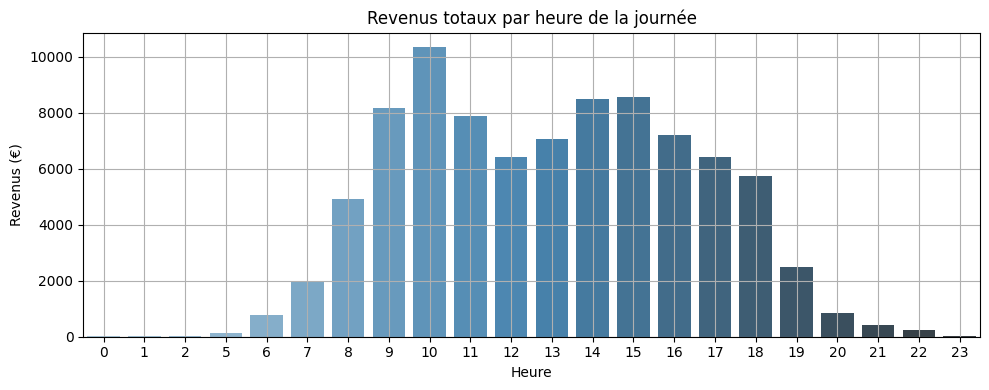


Revenus par heure :
     heure  revenu_total
0       0          14.0
1       1          20.0
2       2          10.0
3       5         122.0
4       6         766.2
5       7        1985.0
6       8        4929.0
7       9        8159.5
8      10       10333.6
9      11        7866.5
10     12        6412.7
11     13        7068.5
12     14        8480.7
13     15        8570.8
14     16        7205.1
15     17        6404.1
16     18        5742.0
17     19        2487.8
18     20         836.6
19     21         427.0
20     22         240.2
21     23          39.0


In [2]:
# Fichiers
df_transact = pd.read_csv("../data_cleaned/laverie1/transactions_transaction_cleaned.csv", parse_dates=[1])  # ajuster [1] si besoin
df_journalier = pd.read_csv("../data_cleaned/laverie1/transactions_jour_cleaned.csv", parse_dates=["date"])

# Uniformiser noms de colonnes
df_transact.columns = [col.strip().lower() for col in df_transact.columns]
df_journalier.columns = [col.strip().lower() for col in df_journalier.columns]

# Ajouter les colonnes utiles
df_transact["heure"] = df_transact["date/heure(europe/paris)"].dt.hour
df_transact["mois"] = df_transact["date/heure(europe/paris)"].dt.to_period("M")

# Étape 2 : Répartition des paiements (CB / pièces / billets)
# Calcul des totaux par moyen de paiement
paiement_totaux = {
    "pièces": df_transact["pièce"].sum(),
    "billets": df_transact["billet"].sum(),
    "CB": df_transact["carte_bancaire"].sum()
}

# Affichage
plt.figure(figsize=(6, 4))
plt.bar(paiement_totaux.keys(), paiement_totaux.values(), color=['gold', 'orange', 'skyblue'])
plt.title("Répartition des paiements")
plt.ylabel("Montant total (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Impression brute
print("\nRépartition des paiements (en €) :", paiement_totaux)
# Étape 3 : Évolution mensuelle du chiffre d'affaires
# Agréger par mois
df_journalier["mois"] = df_journalier["date"].dt.to_period("M")
ca_mensuel = df_journalier.groupby("mois")["ca_tot"].sum().reset_index()

# Graphique
plt.figure(figsize=(10, 4))
plt.plot(ca_mensuel["mois"].astype(str), ca_mensuel["ca_tot"], marker="o")
plt.title("Évolution mensuelle du chiffre d’affaires")
plt.xlabel("Mois")
plt.ylabel("Chiffre d’affaires (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Impression brute
print("\nChiffre d’affaires mensuel :\n", ca_mensuel)

#  Étape 4 : Rentabilité par créneau horaire
# Somme des paiements (espèces + CB) par heure
df_transact["revenu_total"] = df_transact["pièce"] + df_transact["billet"] + df_transact["carte_bancaire"]
ca_par_heure = df_transact.groupby("heure")["revenu_total"].sum().reset_index()

# Graphique
plt.figure(figsize=(10, 4))
sns.barplot(x="heure", y="revenu_total", data=ca_par_heure, palette="Blues_d")
plt.title("Revenus totaux par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Revenus (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Impression brute
print("\nRevenus par heure :\n", ca_par_heure)



## Analyse sur la maintenance et la gestion monétaire

C:\Users\pc\AppData\Local\Temp\ipykernel_1180\498857461.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="nb_alertes", y="type", data=freq_type, palette="Reds_d")


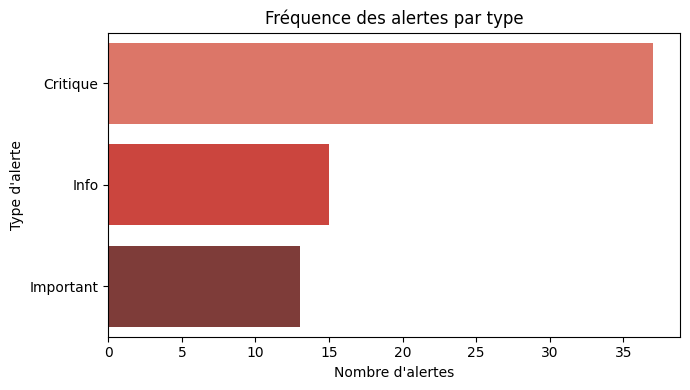

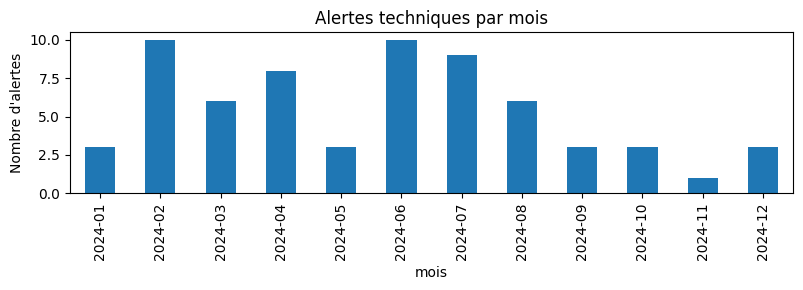


📊 Tableau volume vs alertes :
          volume_encaisse (€)  nb_alertes
mois                                    
2021-01                112.9         0.0
2021-02                214.3         0.0
2021-03                 64.3         0.0
2021-04                  5.0         0.0
2021-05                 10.8         0.0
2021-06                  4.0         0.0
2021-07                101.0         0.0
2021-08                  3.3         0.0
2021-09                171.5         0.0
2021-10                157.9         0.0
2021-11                101.2         0.0
2021-12                190.5         0.0
2022-03                 11.4         0.0
2022-05                 21.5         0.0
2022-06                 10.4         0.0
2022-08                  7.2         0.0
2022-11                 50.5         0.0
2022-12                 68.8         0.0
2023-01                119.7         0.0
2023-02                216.6         0.0
2023-03                248.2         0.0
2023-04                18

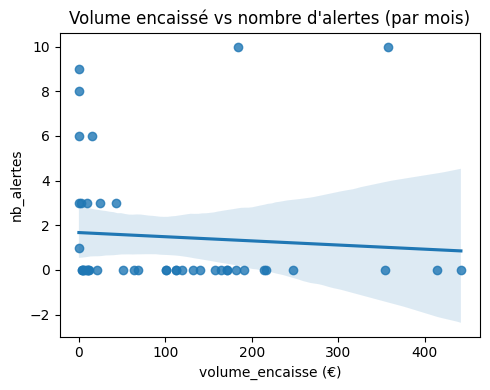


✅ Taux moyen de remplissage : 97.0%


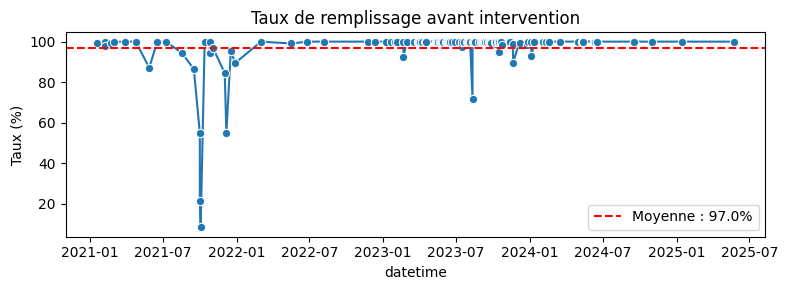

✅ Délai moyen entre deux remplissages : 11.3 jours


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ 1. CHARGEMENT ET NETTOYAGE ------------------

# Forcer noms des colonnes et ignorer la première ligne cassée
df_alert = pd.read_csv(
    "../data_cleaned/laverie1/alertes_cleaned.csv",
    skiprows=1,
    names=["date", "heure", "type", "alerte"]
)

# Nettoyer l'heure (extrait juste HH:MM:SS de "03:36:05Important")
df_alert["heure"] = df_alert["heure"].astype(str).str.extract(r"(\d{2}:\d{2}:\d{2})")

# Supprimer les lignes sans heure valide
df_alert = df_alert.dropna(subset=["heure"])

# Créer datetime et mois
df_alert["datetime"] = pd.to_datetime(df_alert["date"] + " " + df_alert["heure"], errors="coerce")
df_alert = df_alert.dropna(subset=["datetime"])  # si datetime échoue
df_alert["mois"] = df_alert["datetime"].dt.to_period("M")

# Chargement des remplissages
df_fill = pd.read_csv("../data_cleaned/laverie1/remplissages_cleaned.csv")
df_fill.columns = [c.strip().lower() for c in df_fill.columns]
df_fill["datetime"] = pd.to_datetime(df_fill["datetime"], errors="coerce")
df_fill = df_fill.dropna(subset=["datetime"])
df_fill["mois"] = df_fill["datetime"].dt.to_period("M")

# ------------------ 2. FRÉQUENCE DES ALERTES ------------------

if not df_alert.empty:
    # Par type
    freq_type = (
        df_alert.groupby("type")
                .size()
                .reset_index(name="nb_alertes")
                .sort_values("nb_alertes", ascending=False)
    )

    plt.figure(figsize=(7, 4))
    sns.barplot(x="nb_alertes", y="type", data=freq_type, palette="Reds_d")
    plt.title("Fréquence des alertes par type")
    plt.xlabel("Nombre d'alertes")
    plt.ylabel("Type d'alerte")
    plt.tight_layout()
    plt.show()

    # Par mois
    freq_mois = df_alert.groupby("mois").size()

    if not freq_mois.empty:
        freq_mois.plot(kind="bar", figsize=(8, 3), title="Alertes techniques par mois")
        plt.ylabel("Nombre d'alertes")
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Aucun regroupement par mois (freq_mois est vide).")
else:
    print("⚠️ df_alert est vide ou mal formaté.")

# ------------------ 3. CORRÉLATION VOLUME ENCAISSÉ / ALERTES ------------------

vol_mois = df_fill.groupby("mois")["total"].sum()
alert_mois = df_alert.groupby("mois").size()

# Fusion
corr_df = pd.concat([vol_mois, alert_mois], axis=1).fillna(0)
corr_df.columns = ["volume_encaisse (€)", "nb_alertes"]

print("\n📊 Tableau volume vs alertes :\n", corr_df)

# Nuage de points
if not corr_df.empty:
    plt.figure(figsize=(5, 4))
    sns.regplot(x="volume_encaisse (€)", y="nb_alertes", data=corr_df)
    plt.title("Volume encaissé vs nombre d'alertes (par mois)")
    plt.tight_layout()
    plt.show()

# ------------------ 4. TAUX DE REMPLISSAGE & ANTICIPATION ------------------

# Taux de remplissage
df_fill = df_fill[df_fill["trop_plein"] + df_fill["total"] > 0]
df_fill["taux_remplissage"] = (df_fill["total"] / (df_fill["total"] + df_fill["trop_plein"])) * 100
moyen = df_fill["taux_remplissage"].mean().round(1)

print(f"\n✅ Taux moyen de remplissage : {moyen}%")

# Courbe d’évolution
plt.figure(figsize=(8, 3))
sns.lineplot(data=df_fill, x="datetime", y="taux_remplissage", marker="o")
plt.axhline(moyen, color="red", linestyle="--", label=f"Moyenne : {moyen}%")
plt.title("Taux de remplissage avant intervention")
plt.ylabel("Taux (%)")
plt.legend()
plt.tight_layout()
plt.show()

# Délai moyen entre interventions
df_fill = df_fill.sort_values("datetime")
df_fill["delta_jours"] = df_fill["datetime"].diff().dt.days
delai_moy = df_fill["delta_jours"].mean().round(1)

print(f"✅ Délai moyen entre deux remplissages : {delai_moy} jours")


## Consommation énergétique

In [4]:
import pdfplumber
import os
import re
import pandas as pd

# ---------- PARAMÈTRES ----------
facture_dir = "../data_cleaned/edf_factures"     # dossier contenant les 12 PDF
sortie_csv  = "../data_cleaned/conso_elec_laverie.csv"

# Expressions régulières :
regex_kwh = re.compile(r"(\d[\d\s ]+)\s*kWh")       # capture ex. 1 163 kWh (espace fine prise en compte)
regex_ttc = re.compile(r"Facture\s+TTC\s+([\d\s ]+,\d{2})\s*€")

# Abréviations mois EDF → numéro
mois_map = {
    "Jan": 1, "Fév": 2, "Fev": 2, "Mar": 3, "Avr": 4, "Mai": 5, "Juin": 6,
    "Juil": 7, "Aoû": 8, "Aou": 8, "Sept": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

records = []

# ---------- PARCOURS DES PDF ----------
for pdf_file in sorted(os.listdir(facture_dir)):
    if not pdf_file.endswith(".pdf"):
        continue

    pdf_path = os.path.join(facture_dir, pdf_file)
    conso_kwh  = None
    montant_ttc = None
    mois_facture = None

    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text() or ""
            text = text.replace("\u202f", " ")  # remplace espace fine

            # a) Montant TTC (fonctionne dès qu’on le trouve)
            if montant_ttc is None:
                m_ttc = regex_ttc.search(text)
                if m_ttc:
                    montant_ttc = float(m_ttc.group(1).replace(" ", "").replace(",", "."))

            # b) Mois de facture : présent en haut « Facture du 16/04/2024 »
            if mois_facture is None:
                m_mois = re.search(r"Facture du \d{2}/(\d{2})/(\d{4})", text)
                if m_mois:
                    mois_num = int(m_mois.group(1))
                    annee    = int(m_mois.group(2))
                    mois_facture = pd.Timestamp(year=annee, month=mois_num, day=1)

            # c) Consommation : après le bloc « Evolution de la consommation facturée en kWh »
            if "Evolution de la consommation facturée" in text and conso_kwh is None:
                # prendre la page suivante si besoin
                idx = page.page_number
                bloc_page = text
                if idx + 1 <= len(pdf.pages):
                    bloc_page += "\n" + pdf.pages[idx].extract_text()

                m_kwh = regex_kwh.search(bloc_page)
                if m_kwh:
                    conso_kwh = int(m_kwh.group(1).replace(" ", ""))

    # ---------- AJOUT DU RECORD ----------
    if all(v is not None for v in [mois_facture, conso_kwh, montant_ttc]):
        records.append([mois_facture, conso_kwh, montant_ttc])
    else:
        print(f"⚠️ Données incomplètes dans {pdf_file} – à vérifier manuellement")

# ---------- DATAFRAME & EXPORT ----------
df_energie = pd.DataFrame(records, columns=["mois", "kWh", "euros"])
df_energie = df_energie.sort_values("mois").reset_index(drop=True)

print("\nAperçu :", df_energie.head(12))
df_energie.to_csv(sortie_csv, index=False)
print(f"\n✅ Fichier CSV exporté : {sortie_csv}")



Aperçu :          mois   kWh    euros
0  2024-04-01  1163   645.17
1  2024-05-01  1932   482.74
2  2024-06-01  2043   503.64
3  2024-07-01  2034   530.75
4  2024-08-01  1869   511.81
5  2024-09-01  2350   580.43
6  2024-10-01  2521   599.50
7  2024-11-01  4496  1170.43
8  2024-12-01  3212   917.38
9  2024-12-01  2912  1037.30
10 2025-01-01  3241  1132.79
11 2025-02-01  2940  1089.00

✅ Fichier CSV exporté : ../data_cleaned/conso_elec_laverie.csv


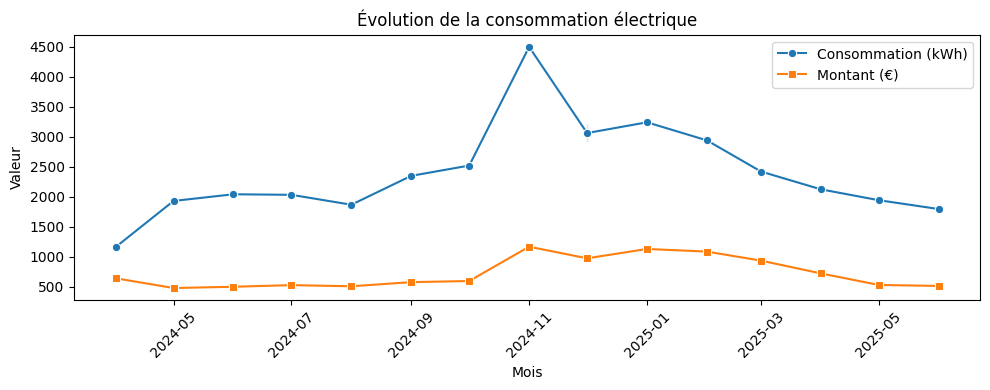

In [5]:
plt.figure(figsize=(10, 4))
sns.lineplot(x="mois", y="kWh", data=df_energie, marker="o", label="Consommation (kWh)")
sns.lineplot(x="mois", y="euros", data=df_energie, marker="s", label="Montant (€)")
plt.title("Évolution de la consommation électrique")
plt.ylabel("Valeur")
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:

# ---------- 1. Table énergie (déjà extraite depuis tes PDF)
df_energie = pd.read_csv("../data_cleaned/conso_elec_laverie.csv", parse_dates=["mois"])

# ---------- 2. Transactions Laverie 1 → fréquentation mensuelle
file_path = "../data_cleaned/laverie1/transactions_transaction_cleaned.csv"
df_trans = pd.read_csv(file_path)

# repérer la colonne date/heure
date_col = [col for col in df_trans.columns if "date" in col.lower() or "heure" in col.lower()][0]
df_trans[date_col] = pd.to_datetime(df_trans[date_col], errors="coerce")

# extraire le mois
df_trans["mois"] = df_trans[date_col].dt.to_period("M").dt.to_timestamp()

# compter tous les cycles par mois
df_frequentation = (
    df_trans.groupby("mois")
            .size()
            .reset_index(name="nb_cycles")
)

# ---------- 3. Ne garder que les mois communs aux factures EDF
mois_factures = df_energie["mois"].unique()
df_frequentation = df_frequentation[df_frequentation["mois"].isin(mois_factures)]

# tri final
df_frequentation = df_frequentation.sort_values("mois").reset_index(drop=True)

print("✅ Fréquentation (mois présents dans les factures) :")
print(df_frequentation)

# ---------- 4. Fusion énergie + fréquentation
df_global = pd.merge(df_energie, df_frequentation, on="mois", how="left")

# calculs finaux
df_global["kWh_par_cycle"]   = (df_global["kWh"]   / df_global["nb_cycles"]).round(2)
df_global["euro_par_cycle"]  = (df_global["euros"] / df_global["nb_cycles"]).round(2)

df_global["empreinte_CO2_kg"] = (df_global["kWh"] * 0.079).round(2)
df_global["CO2_par_cycle"]   = (df_global["empreinte_CO2_kg"] / df_global["nb_cycles"]).round(2)

print("\n📊 Table finale énergie + cycles :")
print(df_global)


✅ Fréquentation (mois présents dans les factures) :
         mois  nb_cycles
0  2024-04-01       1129
1  2024-05-01       1110
2  2024-06-01       1098
3  2024-07-01       1193
4  2024-08-01       1382
5  2024-09-01       1330
6  2024-10-01       1533
7  2024-11-01       1398
8  2024-12-01       1381
9  2025-01-01       1381
10 2025-02-01       1195
11 2025-03-01       1116
12 2025-04-01       1044
13 2025-05-01       1002
14 2025-06-01        885

📊 Table finale énergie + cycles :
         mois   kWh    euros  nb_cycles  kWh_par_cycle  euro_par_cycle  \
0  2024-04-01  1163   645.17       1129           1.03            0.57   
1  2024-05-01  1932   482.74       1110           1.74            0.43   
2  2024-06-01  2043   503.64       1098           1.86            0.46   
3  2024-07-01  2034   530.75       1193           1.70            0.44   
4  2024-08-01  1869   511.81       1382           1.35            0.37   
5  2024-09-01  2350   580.43       1330           1.77            0.4

In [7]:
# Charger les données de consommation EDF
df_energie = pd.read_csv("../data_cleaned/conso_elec_laverie.csv", parse_dates=["mois"])

# Fusion
df_global = pd.merge(df_energie, df_frequentation, on="mois", how="left")

# Calculs
df_global["kWh_par_cycle"] = (df_global["kWh"] / df_global["nb_cycles"]).round(2)
df_global["euro_par_cycle"] = (df_global["euros"] / df_global["nb_cycles"]).round(2)
df_global["empreinte_CO2_kg"] = (df_global["kWh"] * 0.079).round(2)
df_global["CO2_par_cycle"] = (df_global["empreinte_CO2_kg"] / df_global["nb_cycles"]).round(2)

# Résultat final
print("📊 Données énergie + fréquentation fusionnées :")
print(df_global)


📊 Données énergie + fréquentation fusionnées :
         mois   kWh    euros  nb_cycles  kWh_par_cycle  euro_par_cycle  \
0  2024-04-01  1163   645.17       1129           1.03            0.57   
1  2024-05-01  1932   482.74       1110           1.74            0.43   
2  2024-06-01  2043   503.64       1098           1.86            0.46   
3  2024-07-01  2034   530.75       1193           1.70            0.44   
4  2024-08-01  1869   511.81       1382           1.35            0.37   
5  2024-09-01  2350   580.43       1330           1.77            0.44   
6  2024-10-01  2521   599.50       1533           1.64            0.39   
7  2024-11-01  4496  1170.43       1398           3.22            0.84   
8  2024-12-01  3212   917.38       1381           2.33            0.66   
9  2024-12-01  2912  1037.30       1381           2.11            0.75   
10 2025-01-01  3241  1132.79       1381           2.35            0.82   
11 2025-02-01  2940  1089.00       1195           2.46           

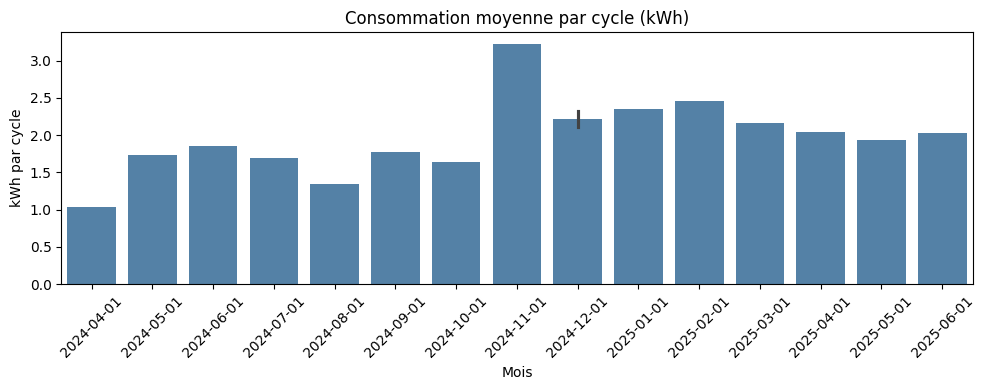

In [8]:
# Histogramme du kWh par cycle

plt.figure(figsize=(10, 4))
sns.barplot(x="mois", y="kWh_par_cycle", data=df_global, color="steelblue")
plt.xticks(rotation=45)
plt.title("Consommation moyenne par cycle (kWh)")
plt.xlabel("Mois")
plt.ylabel("kWh par cycle")
plt.tight_layout()
plt.show()

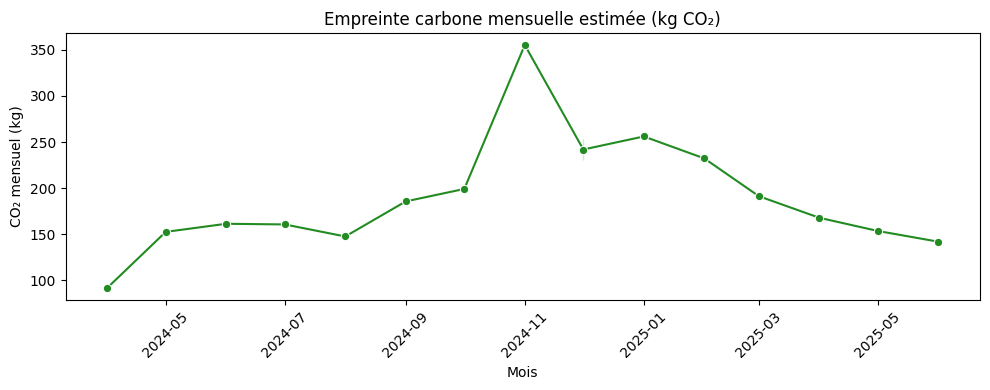

In [9]:

# Courbe de l’empreinte carbone mensuelle
plt.figure(figsize=(10, 4))
sns.lineplot(x="mois", y="empreinte_CO2_kg", data=df_global, marker="o", color="forestgreen")
plt.xticks(rotation=45)
plt.title("Empreinte carbone mensuelle estimée (kg CO₂)")
plt.xlabel("Mois")
plt.ylabel("CO₂ mensuel (kg)")
plt.tight_layout()
plt.show()


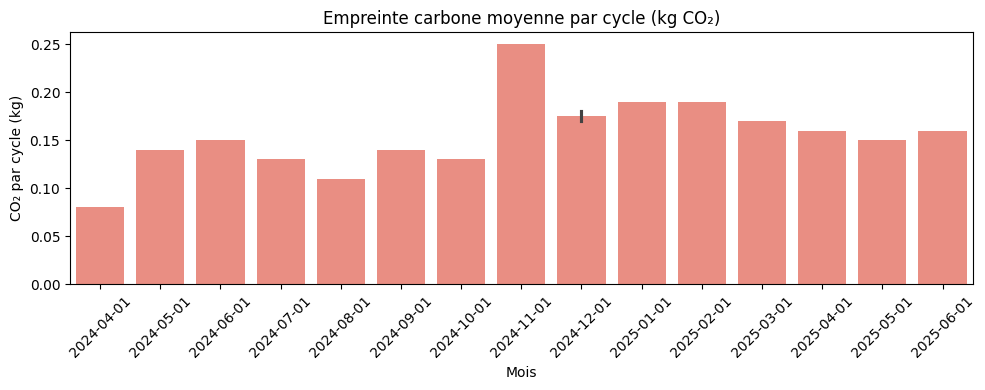

In [10]:
# Zoom sur CO₂ par cycle
plt.figure(figsize=(10, 4))
sns.barplot(x="mois", y="CO2_par_cycle", data=df_global, color="salmon")
plt.xticks(rotation=45)
plt.title("Empreinte carbone moyenne par cycle (kg CO₂)")
plt.xlabel("Mois")
plt.ylabel("CO₂ par cycle (kg)")
plt.tight_layout()
plt.show()


### Corrélation avec les jours féries Laverie1

Fréquentation moyenne pour Laverie 1:
 Jours fériés     : 41.24 cycles
 Jours non fériés : 39.96 cycles


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\2737337569.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_freq_jour, x="ferie", y="nb_cycles", ci=None, palette="pastel")
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\2737337569.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_freq_jour, x="ferie", y="nb_cycles", ci=None, palette="pastel")


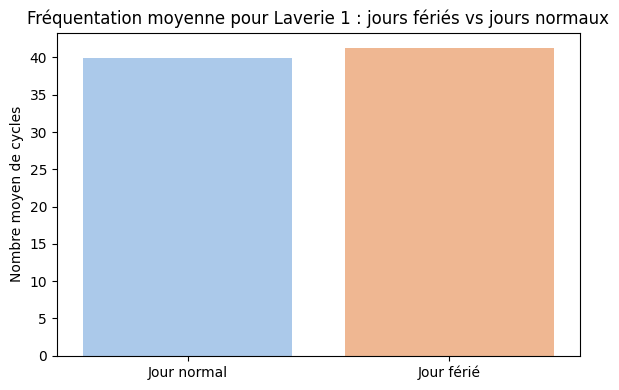

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transactions Laverie 1
df = pd.read_csv("../data_cleaned/laverie1/transactions_transaction_cleaned.csv")
date_col = [col for col in df.columns if "date" in col.lower() or "heure" in col.lower()][0]
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df["date"] = df[date_col].dt.normalize()  # format datetime avec heure 00:00:00

# Nombre de cycles par jour
df_freq_jour = df.groupby("date").size().reset_index(name="nb_cycles")

# 2. Jours fériés
df_feries = pd.read_csv("../data_external/jours_feries_metropole.csv", parse_dates=["date"])
df_feries = df_feries[df_feries["annee"].isin([2024, 2025])]

# Normaliser au même format
df_feries["date"] = df_feries["date"].dt.normalize()

# 3. Fusion avec marquage "ferie"
df_freq_jour = df_freq_jour.merge(df_feries[["date"]], on="date", how="left", indicator="ferie_flag")
df_freq_jour["ferie"] = (df_freq_jour["ferie_flag"] == "both").astype(int)
df_freq_jour.drop(columns="ferie_flag", inplace=True)

# 4. Statistiques
moyenne_ferie = df_freq_jour[df_freq_jour["ferie"] == 1]["nb_cycles"].mean()
moyenne_non_ferie = df_freq_jour[df_freq_jour["ferie"] == 0]["nb_cycles"].mean()

print("Fréquentation moyenne pour Laverie 1:")
print(f" Jours fériés     : {moyenne_ferie:.2f} cycles")
print(f" Jours non fériés : {moyenne_non_ferie:.2f} cycles")

# 5. Graphe
plt.figure(figsize=(6,4))
sns.barplot(data=df_freq_jour, x="ferie", y="nb_cycles", ci=None, palette="pastel")
plt.xticks([0, 1], ["Jour normal", "Jour férié"])
plt.title("Fréquentation moyenne pour Laverie 1 : jours fériés vs jours normaux")
plt.ylabel("Nombre moyen de cycles")
plt.xlabel("")
plt.tight_layout()
plt.show()


### Corrélation avec les vacances scolaires Laverie 1

Fréquentation moyenne pour Laverie 1 :
Pendant vacances  : 43.82 cycles/jour
Hors vacances     : 38.25 cycles/jour


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\1836901054.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_freq, x="vacances", y="nb_cycles", palette="Set2", ci=None)
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\1836901054.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_freq, x="vacances", y="nb_cycles", palette="Set2", ci=None)


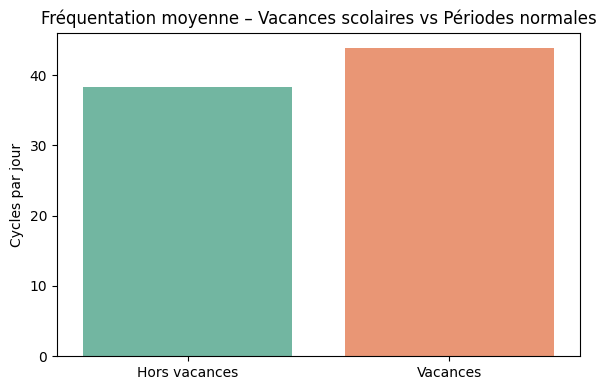

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ---------- 1. Charger les transactions de Laverie 1 ----------
df = pd.read_csv(Path("../data_cleaned/laverie1/transactions_transaction_cleaned.csv"))

# Identifier la colonne contenant la date ou l'heure
date_col = next(c for c in df.columns if "date" in c.lower() or "heure" in c.lower())
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df["date"] = df[date_col].dt.normalize()

# Fréquentation quotidienne
df_freq = df.groupby("date").size().reset_index(name="nb_cycles")

# ---------- 2. Charger les données de vacances scolaires ----------
vac_path = Path("../data_external/fr-en-calendrier-scolaire.csv")
df_vac = pd.read_csv(vac_path, sep=";", engine="python")

# Nettoyage des noms de colonnes
df_vac.columns = df_vac.columns.str.strip().str.lower()
df_vac = df_vac.rename(columns={
    "date de début": "date_debut",
    "date de fin": "date_fin",
    "zones": "zone"
})

# Conversion des dates avec suppression des fuseaux horaires
df_vac["date_debut"] = pd.to_datetime(df_vac["date_debut"], errors="coerce", utc=True).dt.tz_localize(None)
df_vac["date_fin"]   = pd.to_datetime(df_vac["date_fin"], errors="coerce", utc=True).dt.tz_localize(None)
df_vac = df_vac.dropna(subset=["date_debut", "date_fin"])

# Filtrer Zone B entre 2024-01-01 et 2025-07-01
df_vac = df_vac[
    (df_vac["zone"].str.upper() == "ZONE B") &
    (df_vac["date_debut"] >= pd.to_datetime("2024-01-01")) &
    (df_vac["date_debut"] <= pd.to_datetime("2025-07-01"))
]

# ---------- 3. Générer tous les jours de vacances ----------
jours_list = [
    pd.Series(pd.date_range(row["date_debut"], row["date_fin"]))
    for _, row in df_vac.iterrows()
]

jours_vacances = (
    pd.concat(jours_list)
    .dt.normalize()
    .drop_duplicates()
)

# ---------- 4. Marquer les jours de vacances ----------
df_freq["vacances"] = df_freq["date"].isin(jours_vacances)

# ---------- 5. Moyennes comparées ----------
moy_vac = df_freq[df_freq["vacances"]]["nb_cycles"].mean()
moy_hors = df_freq[~df_freq["vacances"]]["nb_cycles"].mean()

print("Fréquentation moyenne pour Laverie 1 :")
print(f"Pendant vacances  : {moy_vac:.2f} cycles/jour")
print(f"Hors vacances     : {moy_hors:.2f} cycles/jour")

# ---------- 6. Visualisation ----------
plt.figure(figsize=(6, 4))
sns.barplot(data=df_freq, x="vacances", y="nb_cycles", palette="Set2", ci=None)
plt.xticks([0, 1], ["Hors vacances", "Vacances"])
plt.title("Fréquentation moyenne – Vacances scolaires vs Périodes normales")
plt.ylabel("Cycles par jour")
plt.xlabel("")
plt.tight_layout()
plt.show()


###

Fréquentation moyenne pour Laverie 2 :
 Jours fériés     : 33.76 cycles
 Jours non fériés : 36.84 cycles


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3995244742.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_freq_jour, x="ferie", y="nb_cycles", ci=None, palette="pastel")
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3995244742.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_freq_jour, x="ferie", y="nb_cycles", ci=None, palette="pastel")


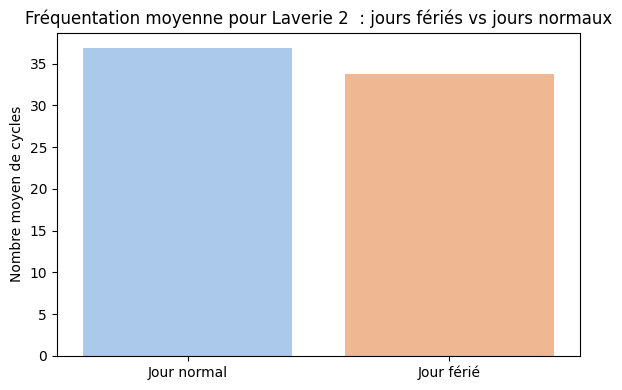

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transactions Laverie 1
df = pd.read_csv("../data_cleaned/laverie2/transactions_transaction_cleaned.csv")
date_col = [col for col in df.columns if "date" in col.lower() or "heure" in col.lower()][0]
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df["date"] = df[date_col].dt.normalize()  # format datetime avec heure 00:00:00

# Nombre de cycles par jour
df_freq_jour = df.groupby("date").size().reset_index(name="nb_cycles")

# 2. Jours fériés
df_feries = pd.read_csv("../data_external/jours_feries_metropole.csv", parse_dates=["date"])
df_feries = df_feries[df_feries["annee"].isin([2024, 2025])]

# Normaliser au même format
df_feries["date"] = df_feries["date"].dt.normalize()

# 3. Fusion avec marquage "ferie"
df_freq_jour = df_freq_jour.merge(df_feries[["date"]], on="date", how="left", indicator="ferie_flag")
df_freq_jour["ferie"] = (df_freq_jour["ferie_flag"] == "both").astype(int)
df_freq_jour.drop(columns="ferie_flag", inplace=True)

# 4. Statistiques
moyenne_ferie = df_freq_jour[df_freq_jour["ferie"] == 1]["nb_cycles"].mean()
moyenne_non_ferie = df_freq_jour[df_freq_jour["ferie"] == 0]["nb_cycles"].mean()

print("Fréquentation moyenne pour Laverie 2 :")
print(f" Jours fériés     : {moyenne_ferie:.2f} cycles")
print(f" Jours non fériés : {moyenne_non_ferie:.2f} cycles")

# 5. Graphe
plt.figure(figsize=(6,4))
sns.barplot(data=df_freq_jour, x="ferie", y="nb_cycles", ci=None, palette="pastel")
plt.xticks([0, 1], ["Jour normal", "Jour férié"])
plt.title("Fréquentation moyenne pour Laverie 2  : jours fériés vs jours normaux")
plt.ylabel("Nombre moyen de cycles")
plt.xlabel("")
plt.tight_layout()
plt.show()


Fréquentation moyenne Laverie 2:
 Pendant vacances  : 39.67 cycles/jour
 Hors vacances     : 35.40 cycles/jour


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3241905895.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_freq, x="vacances", y="nb_cycles", palette="Set2", ci=None)
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3241905895.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_freq, x="vacances", y="nb_cycles", palette="Set2", ci=None)


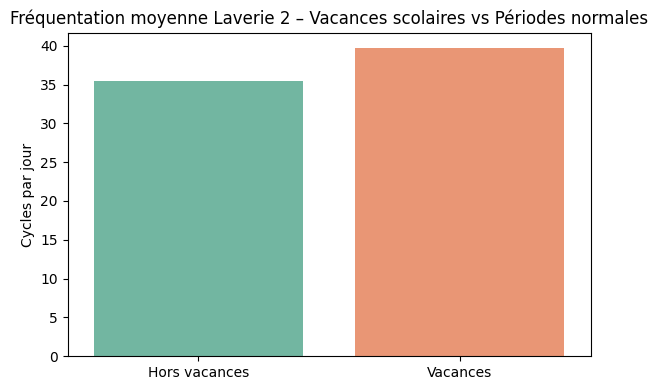

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ---------- 1. Charger les transactions de Laverie 1 ----------
df = pd.read_csv(Path("../data_cleaned/laverie2/transactions_transaction_cleaned.csv"))

# Identifier la colonne contenant la date ou l'heure
date_col = next(c for c in df.columns if "date" in c.lower() or "heure" in c.lower())
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df["date"] = df[date_col].dt.normalize()

# Fréquentation quotidienne
df_freq = df.groupby("date").size().reset_index(name="nb_cycles")

# ---------- 2. Charger les données de vacances scolaires ----------
vac_path = Path("../data_external/fr-en-calendrier-scolaire.csv")
df_vac = pd.read_csv(vac_path, sep=";", engine="python")

# Nettoyage des noms de colonnes
df_vac.columns = df_vac.columns.str.strip().str.lower()
df_vac = df_vac.rename(columns={
    "date de début": "date_debut",
    "date de fin": "date_fin",
    "zones": "zone"
})

# Conversion des dates avec suppression des fuseaux horaires
df_vac["date_debut"] = pd.to_datetime(df_vac["date_debut"], errors="coerce", utc=True).dt.tz_localize(None)
df_vac["date_fin"]   = pd.to_datetime(df_vac["date_fin"], errors="coerce", utc=True).dt.tz_localize(None)
df_vac = df_vac.dropna(subset=["date_debut", "date_fin"])

# Filtrer Zone B entre 2024-01-01 et 2025-07-01
df_vac = df_vac[
    (df_vac["zone"].str.upper() == "ZONE B") &
    (df_vac["date_debut"] >= pd.to_datetime("2024-01-01")) &
    (df_vac["date_debut"] <= pd.to_datetime("2025-07-01"))
]

# ---------- 3. Générer tous les jours de vacances ----------
jours_list = [
    pd.Series(pd.date_range(row["date_debut"], row["date_fin"]))
    for _, row in df_vac.iterrows()
]

jours_vacances = (
    pd.concat(jours_list)
    .dt.normalize()
    .drop_duplicates()
)

# ---------- 4. Marquer les jours de vacances ----------
df_freq["vacances"] = df_freq["date"].isin(jours_vacances)

# ---------- 5. Moyennes comparées ----------
moy_vac = df_freq[df_freq["vacances"]]["nb_cycles"].mean()
moy_hors = df_freq[~df_freq["vacances"]]["nb_cycles"].mean()

print("Fréquentation moyenne Laverie 2:")
print(f" Pendant vacances  : {moy_vac:.2f} cycles/jour")
print(f" Hors vacances     : {moy_hors:.2f} cycles/jour")

# ---------- 6. Visualisation ----------
plt.figure(figsize=(6, 4))
sns.barplot(data=df_freq, x="vacances", y="nb_cycles", palette="Set2", ci=None)
plt.xticks([0, 1], ["Hors vacances", "Vacances"])
plt.title("Fréquentation moyenne Laverie 2 – Vacances scolaires vs Périodes normales")
plt.ylabel("Cycles par jour")
plt.xlabel("")
plt.tight_layout()
plt.show()


## Météo 

📊 Fréquentation moyenne (Laverie 1)
  • Jours froids  (<10 °C)  : 41.88 cycles/jour
  • Jours doux   (≥10 °C)  : 39.42 cycles/jour
  • Jours de pluie (>1 mm) : 32.00 cycles/jour
  • Jours secs            : 40.01 cycles/jour


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\2333985860.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="froid", y="nb_cycles", data=df, palette="coolwarm", ci=None)
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\2333985860.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="froid", y="nb_cycles", data=df, palette="coolwarm", ci=None)
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\2333985860.py:82: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="pluie", y="nb_cycles", data=df, palette="Blues", ci=None)
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\2333985860.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and se

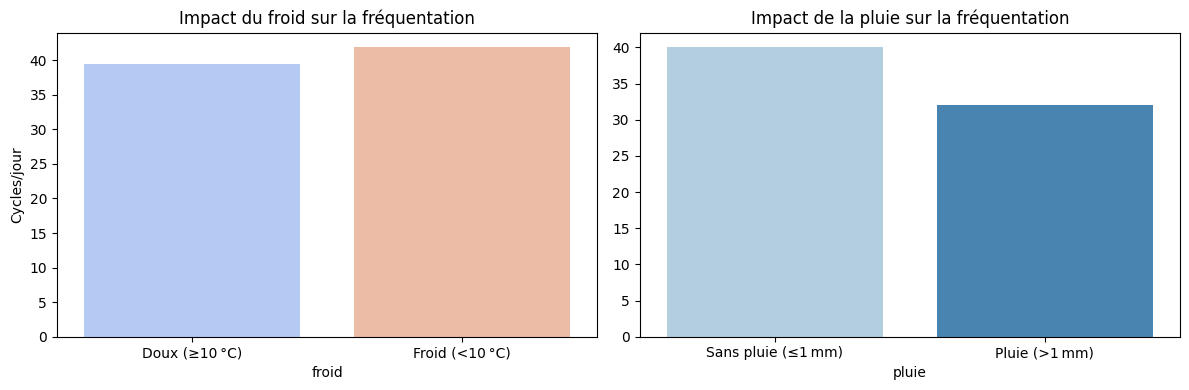

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ------------------------------------------------------------------
# 1. Charger et fusionner les fichiers météo
# ------------------------------------------------------------------
meteo_dir = Path("../data_external")  # adapte si besoin
files = [
    meteo_dir / "meteo_Lille_2024-01-01_to_2025-01-01.csv",
    meteo_dir / "meteo_Lille_2025-01-01_to_2025-07-01.csv"
]

df_meteo = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

# Garder les colonnes utiles
df_meteo = df_meteo[["datetime", "tempmax", "precip"]].copy()
df_meteo["date"] = pd.to_datetime(df_meteo["datetime"]).dt.normalize()

# Agrégation par jour
df_meteo = (
    df_meteo.groupby("date")
            .agg(tmax=("tempmax", "max"), precip_mm=("precip", "sum"))
            .reset_index()
)

# 🔁 Conversion de Fahrenheit en Celsius
df_meteo["tmax"] = (df_meteo["tmax"] - 32) * 5 / 9

# ------------------------------------------------------------------
# 2. Fréquentation journalière (Laverie 1)
# ------------------------------------------------------------------
df_tx = pd.read_csv("../data_cleaned/laverie1/transactions_transaction_cleaned.csv")
date_col = [c for c in df_tx.columns if "date" in c.lower() or "heure" in c.lower()][0]
df_tx[date_col] = pd.to_datetime(df_tx[date_col], errors="coerce")
df_tx["date"] = df_tx[date_col].dt.normalize()

df_freq = (
    df_tx.groupby("date")
         .size()
         .reset_index(name="nb_cycles")
)

# ------------------------------------------------------------------
# 3. Fusion météo + fréquentation
# ------------------------------------------------------------------
df = pd.merge(df_freq, df_meteo, on="date", how="left")

# Indicateurs météo binaires
df["froid"] = df["tmax"] < 10               # <10°C considéré comme froid
df["pluie"] = df["precip_mm"] > 1.0         # pluie > 1 mm considérée significative

# ------------------------------------------------------------------
# 4. Statistiques descriptives
# ------------------------------------------------------------------
moy_froid      = df[df["froid"]]["nb_cycles"].mean()
moy_non_froid  = df[~df["froid"]]["nb_cycles"].mean()
moy_pluie      = df[df["pluie"]]["nb_cycles"].mean()
moy_pas_pluie  = df[~df["pluie"]]["nb_cycles"].mean()

print("📊 Fréquentation moyenne (Laverie 1)")
print(f"  • Jours froids  (<10 °C)  : {moy_froid:.2f} cycles/jour")
print(f"  • Jours doux   (≥10 °C)  : {moy_non_froid:.2f} cycles/jour")
print(f"  • Jours de pluie (>1 mm) : {moy_pluie:.2f} cycles/jour")
print(f"  • Jours secs            : {moy_pas_pluie:.2f} cycles/jour")

# ------------------------------------------------------------------
# 5. Visualisations
# ------------------------------------------------------------------
plt.figure(figsize=(12, 4))

# a) Froid / Doux
plt.subplot(1, 2, 1)
sns.barplot(x="froid", y="nb_cycles", data=df, palette="coolwarm", ci=None)
plt.xticks([0, 1], ["Doux (≥10 °C)", "Froid (<10 °C)"])
plt.ylabel("Cycles/jour")
plt.title("Impact du froid sur la fréquentation")

# b) Pluie / Sec
plt.subplot(1, 2, 2)
sns.barplot(x="pluie", y="nb_cycles", data=df, palette="Blues", ci=None)
plt.xticks([0, 1], ["Sans pluie (≤1 mm)", "Pluie (>1 mm)"])
plt.ylabel("")
plt.title("Impact de la pluie sur la fréquentation")

plt.tight_layout()
plt.show()


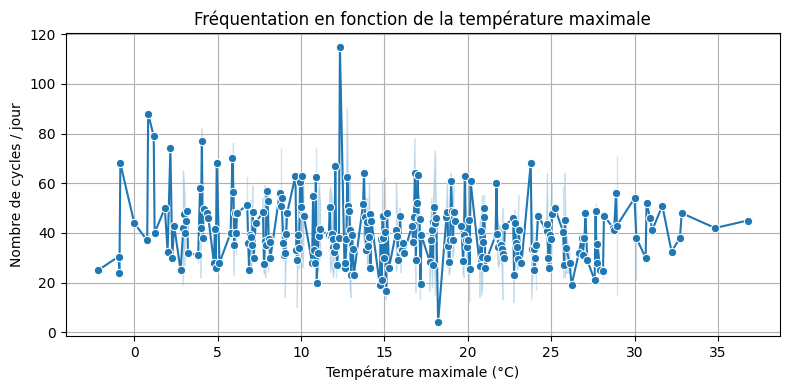

In [25]:
# Courbe fréquentation vs température 
plt.figure(figsize=(8, 4))
sns.lineplot(data=df.sort_values("tmax"), x="tmax", y="nb_cycles", marker="o")
plt.title("Fréquentation en fonction de la température maximale")
plt.xlabel("Température maximale (°C)")
plt.ylabel("Nombre de cycles / jour")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\4293965111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="froid", y="nb_cycles", palette="coolwarm")


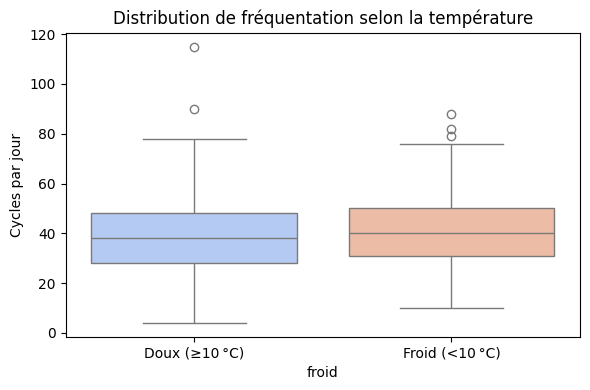

In [26]:
# Boxplot par température binaire (froid vs doux)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="froid", y="nb_cycles", palette="coolwarm")
plt.xticks([0, 1], ["Doux (≥10 °C)", "Froid (<10 °C)"])
plt.title("Distribution de fréquentation selon la température")
plt.ylabel("Cycles par jour")
plt.tight_layout()
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\2954299278.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index="t_bin", columns="p_bin", values="nb_cycles", aggfunc="mean")


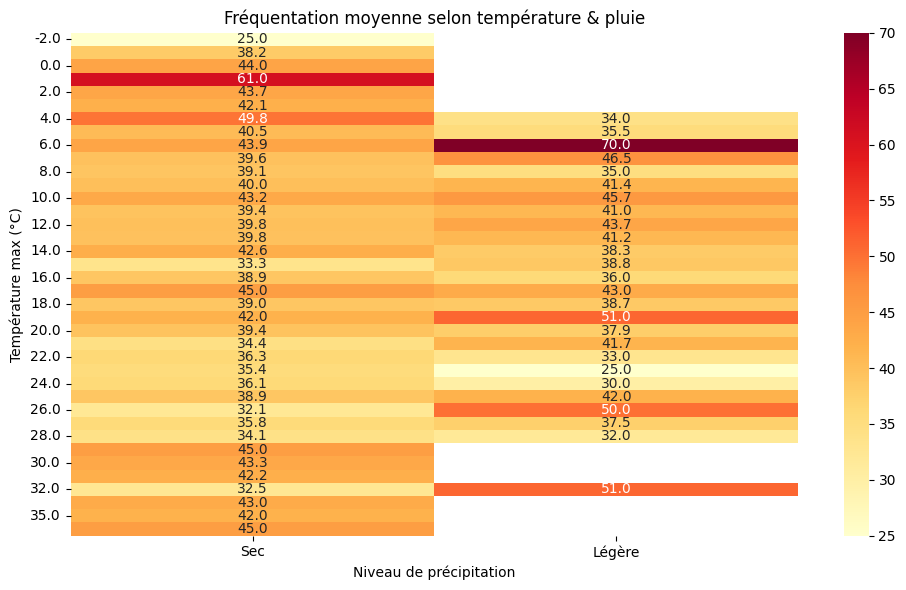

In [27]:
# Heatmap température x précipitation
df["t_bin"] = df["tmax"].round(0)      # température arrondie
df["p_bin"] = pd.cut(df["precip_mm"], bins=[-0.1, 0.1, 2, 5, 10, 100],
                     labels=["Sec", "Légère", "Modérée", "Forte", "Très forte"])

pivot = df.pivot_table(index="t_bin", columns="p_bin", values="nb_cycles", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Fréquentation moyenne selon température & pluie")
plt.xlabel("Niveau de précipitation")
plt.ylabel("Température max (°C)")
plt.tight_layout()
plt.show()



📊 Utilisation des séchoirs (Laverie 1)
  • Jours froids  (<10 °C) : 25.24 cycles/jour
  • Jours doux   (≥10 °C) : 19.76 cycles/jour


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3384708981.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3384708981.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


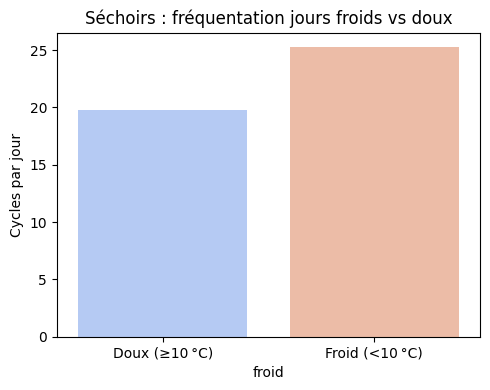

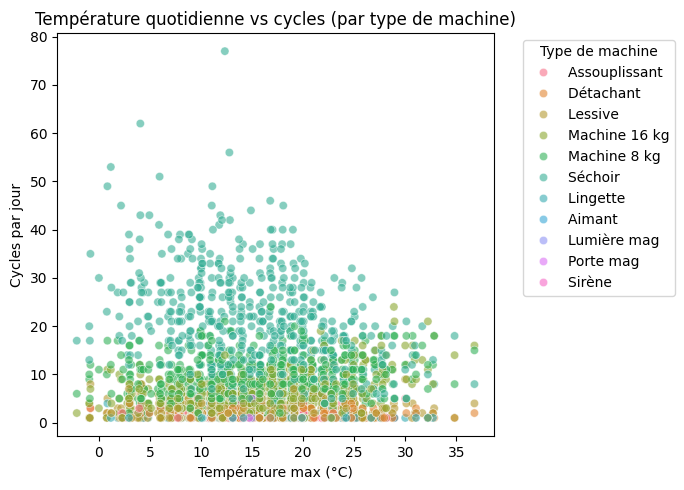

In [28]:


# ------------------------------------------------------------------
# 3. Fréquentation par date ET par type de machine
# ------------------------------------------------------------------
df_daily_type = (
    df_tx.groupby(["date", "description"])       # 'description' = Machine 16 kg / Séchoir…
         .size()
         .reset_index(name="nb_cycles")
)

# ------------------------------------------------------------------
# 4. Fusion avec la météo
# ------------------------------------------------------------------
df = pd.merge(df_daily_type, df_meteo, on="date", how="left")

# Définir la variable "froid" (<10 °C) et filtrer Séchoir uniquement
df["froid"] = df["tmax"] < 10
df_sechoir  = df[df["description"].str.contains("Séchoir", case=False, na=False)]

# ------------------------------------------------------------------
# 5. Statistiques : séchoir jours froids / doux
# ------------------------------------------------------------------
moy_s_froid = df_sechoir[df_sechoir["froid"]]["nb_cycles"].mean()
moy_s_doux  = df_sechoir[~df_sechoir["froid"]]["nb_cycles"].mean()

print("\n📊 Utilisation des séchoirs (Laverie 1)")
print(f"  • Jours froids  (<10 °C) : {moy_s_froid:.2f} cycles/jour")
print(f"  • Jours doux   (≥10 °C) : {moy_s_doux:.2f} cycles/jour")

# ------------------------------------------------------------------
# 6. Visualisation 1 : barplot Séchoir — froid vs doux
# ------------------------------------------------------------------
plt.figure(figsize=(5,4))
sns.barplot(
    data=df_sechoir,
    x="froid",
    y="nb_cycles",
    palette="coolwarm",
    ci=None
)
plt.xticks([0,1], ["Doux (≥10 °C)", "Froid (<10 °C)"])
plt.title("Séchoirs : fréquentation jours froids vs doux")
plt.ylabel("Cycles par jour")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 7. Visualisation 2 : scatter temp. vs cycles pour chaque type
# ------------------------------------------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="tmax",
    y="nb_cycles",
    hue="description",
    alpha=0.6
)
plt.title("Température quotidienne vs cycles (par type de machine)")
plt.xlabel("Température max (°C)")
plt.ylabel("Cycles par jour")
plt.legend(title="Type de machine", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


### Météo Laverie 2

📊 Fréquentation moyenne (Laverie 2)
  • Jours froids  (<10 °C)  : 38.05 cycles/jour
  • Jours doux   (≥10 °C)  : 36.34 cycles/jour
  • Jours de pluie (>1 mm) : 46.00 cycles/jour
  • Jours secs            : 36.73 cycles/jour


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3330583917.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="froid", y="nb_cycles", data=df, palette="coolwarm", ci=None)
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3330583917.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="froid", y="nb_cycles", data=df, palette="coolwarm", ci=None)
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3330583917.py:82: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="pluie", y="nb_cycles", data=df, palette="Blues", ci=None)
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3330583917.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and se

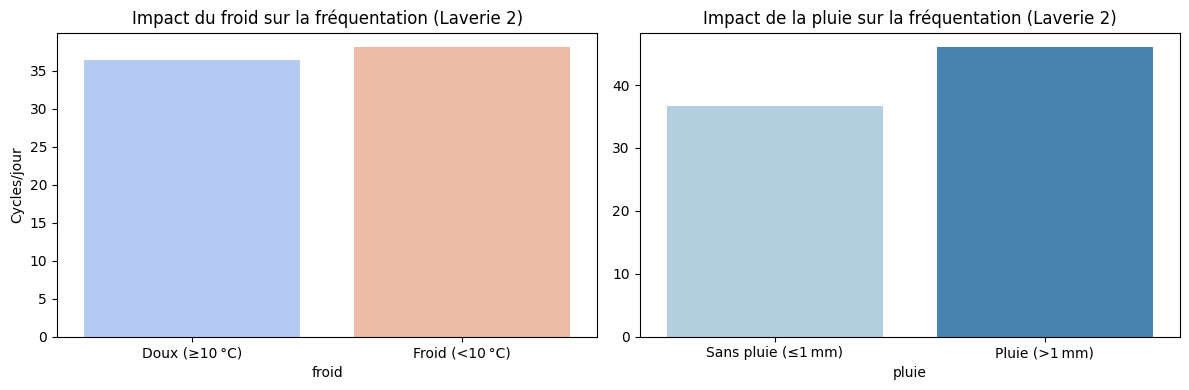

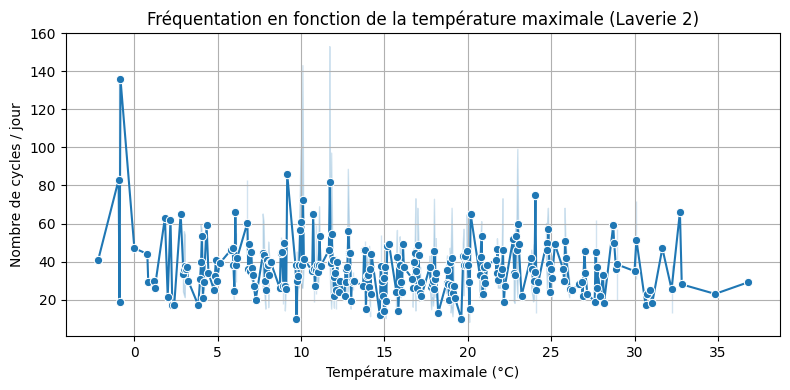

C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3330583917.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="froid", y="nb_cycles", palette="coolwarm")


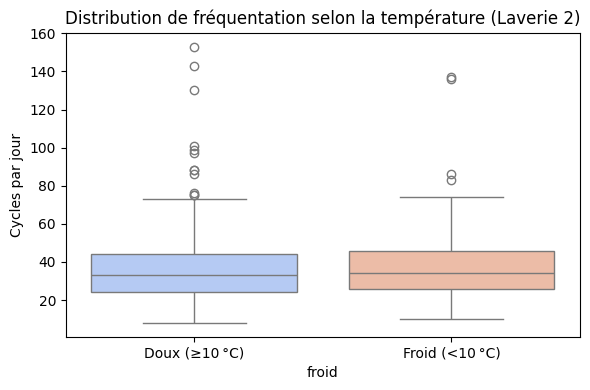

C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3330583917.py:114: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index="t_bin", columns="p_bin", values="nb_cycles", aggfunc="mean")


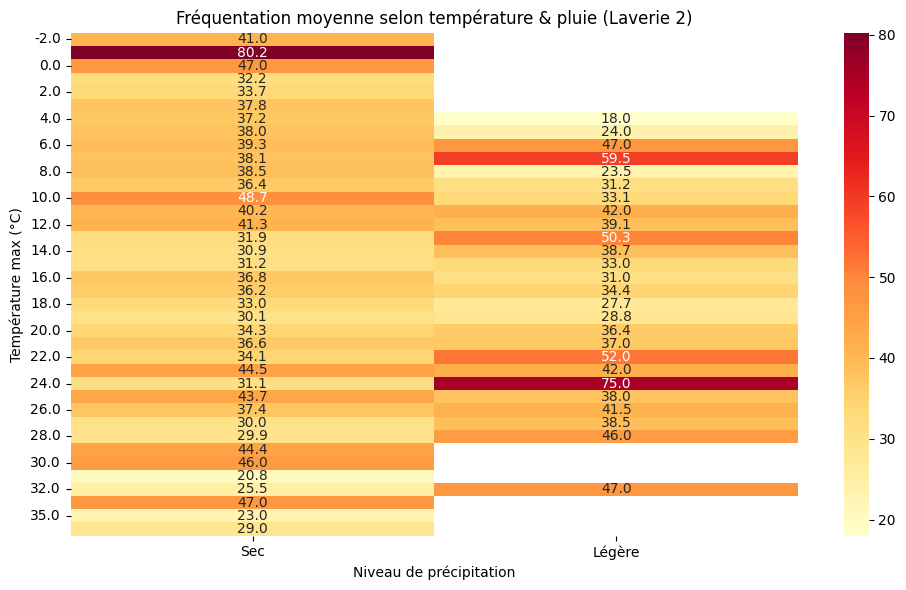


📊 Utilisation des séchoirs (Laverie 1)
  • Jours froids  (<10 °C) : 22.05 cycles/jour
  • Jours doux   (≥10 °C) : 19.66 cycles/jour


C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3330583917.py:159: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\pc\AppData\Local\Temp\ipykernel_1180\3330583917.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


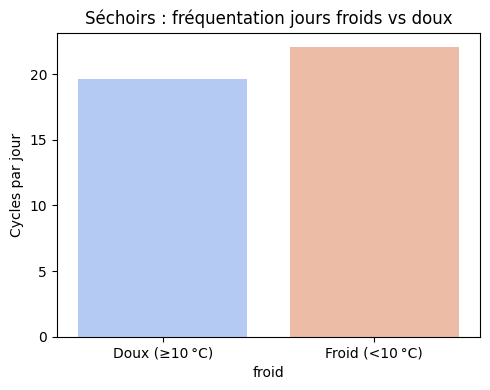

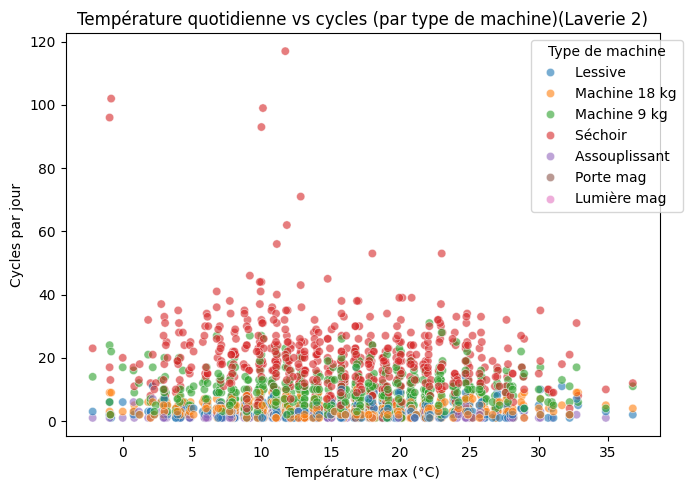

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ------------------------------------------------------------------
# 1. Charger et fusionner les fichiers météo
# ------------------------------------------------------------------
meteo_dir = Path("../data_external")  # adapte si besoin
files = [
    meteo_dir / "meteo_Lille_2024-01-01_to_2025-01-01.csv",
    meteo_dir / "meteo_Lille_2025-01-01_to_2025-07-01.csv"
]

df_meteo = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

# Garder les colonnes utiles
df_meteo = df_meteo[["datetime", "tempmax", "precip"]].copy()
df_meteo["date"] = pd.to_datetime(df_meteo["datetime"]).dt.normalize()

# Agrégation par jour
df_meteo = (
    df_meteo.groupby("date")
            .agg(tmax=("tempmax", "max"), precip_mm=("precip", "sum"))
            .reset_index()
)

# 🔁 Conversion de Fahrenheit en Celsius
df_meteo["tmax"] = (df_meteo["tmax"] - 32) * 5 / 9

# ------------------------------------------------------------------
# 2. Fréquentation journalière (Laverie 2)
# ------------------------------------------------------------------
df_tx = pd.read_csv("../data_cleaned/laverie2/transactions_transaction_cleaned.csv")
date_col = [c for c in df_tx.columns if "date" in c.lower() or "heure" in c.lower()][0]
df_tx[date_col] = pd.to_datetime(df_tx[date_col], errors="coerce")
df_tx["date"] = df_tx[date_col].dt.normalize()

df_freq = (
    df_tx.groupby("date")
         .size()
         .reset_index(name="nb_cycles")
)

# ------------------------------------------------------------------
# 3. Fusion météo + fréquentation
# ------------------------------------------------------------------
df = pd.merge(df_freq, df_meteo, on="date", how="left")

# Indicateurs météo binaires
df["froid"] = df["tmax"] < 10               # <10°C considéré comme froid
df["pluie"] = df["precip_mm"] > 1.0         # pluie > 1 mm considérée significative

# ------------------------------------------------------------------
# 4. Statistiques descriptives
# ------------------------------------------------------------------
moy_froid      = df[df["froid"]]["nb_cycles"].mean()
moy_non_froid  = df[~df["froid"]]["nb_cycles"].mean()
moy_pluie      = df[df["pluie"]]["nb_cycles"].mean()
moy_pas_pluie  = df[~df["pluie"]]["nb_cycles"].mean()

print("📊 Fréquentation moyenne (Laverie 2)")
print(f"  • Jours froids  (<10 °C)  : {moy_froid:.2f} cycles/jour")
print(f"  • Jours doux   (≥10 °C)  : {moy_non_froid:.2f} cycles/jour")
print(f"  • Jours de pluie (>1 mm) : {moy_pluie:.2f} cycles/jour")
print(f"  • Jours secs            : {moy_pas_pluie:.2f} cycles/jour")

# ------------------------------------------------------------------
# 5. Visualisations
# ------------------------------------------------------------------
plt.figure(figsize=(12, 4))

# a) Froid / Doux
plt.subplot(1, 2, 1)
sns.barplot(x="froid", y="nb_cycles", data=df, palette="coolwarm", ci=None)
plt.xticks([0, 1], ["Doux (≥10 °C)", "Froid (<10 °C)"])
plt.ylabel("Cycles/jour")
plt.title("Impact du froid sur la fréquentation (Laverie 2)")

# b) Pluie / Sec
plt.subplot(1, 2, 2)
sns.barplot(x="pluie", y="nb_cycles", data=df, palette="Blues", ci=None)
plt.xticks([0, 1], ["Sans pluie (≤1 mm)", "Pluie (>1 mm)"])
plt.ylabel("")
plt.title("Impact de la pluie sur la fréquentation (Laverie 2)")

plt.tight_layout()
plt.show()

# Courbe fréquentation vs température 
plt.figure(figsize=(8, 4))
sns.lineplot(data=df.sort_values("tmax"), x="tmax", y="nb_cycles", marker="o")
plt.title("Fréquentation en fonction de la température maximale (Laverie 2)")
plt.xlabel("Température maximale (°C)")
plt.ylabel("Nombre de cycles / jour")
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot par température binaire (froid vs doux)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="froid", y="nb_cycles", palette="coolwarm")
plt.xticks([0, 1], ["Doux (≥10 °C)", "Froid (<10 °C)"])
plt.title("Distribution de fréquentation selon la température (Laverie 2)")
plt.ylabel("Cycles par jour")
plt.tight_layout()
plt.show()

# Heatmap température x précipitation
df["t_bin"] = df["tmax"].round(0)      # température arrondie
df["p_bin"] = pd.cut(df["precip_mm"], bins=[-0.1, 0.1, 2, 5, 10, 100],
                     labels=["Sec", "Légère", "Modérée", "Forte", "Très forte"])

pivot = df.pivot_table(index="t_bin", columns="p_bin", values="nb_cycles", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Fréquentation moyenne selon température & pluie (Laverie 2)")
plt.xlabel("Niveau de précipitation")
plt.ylabel("Température max (°C)")
plt.tight_layout()
plt.show()




# ------------------------------------------------------------------
# 3. Fréquentation par date ET par type de machine
# ------------------------------------------------------------------
df_daily_type = (
    df_tx.groupby(["date", "description"])       # 'description' = Machine 16 kg / Séchoir…
         .size()
         .reset_index(name="nb_cycles")
)

# ------------------------------------------------------------------
# 4. Fusion avec la météo
# ------------------------------------------------------------------
df = pd.merge(df_daily_type, df_meteo, on="date", how="left")

# Définir la variable "froid" (<10 °C) et filtrer Séchoir uniquement
df["froid"] = df["tmax"] < 10
df_sechoir  = df[df["description"].str.contains("Séchoir", case=False, na=False)]

# ------------------------------------------------------------------
# 5. Statistiques : séchoir jours froids / doux
# ------------------------------------------------------------------
moy_s_froid = df_sechoir[df_sechoir["froid"]]["nb_cycles"].mean()
moy_s_doux  = df_sechoir[~df_sechoir["froid"]]["nb_cycles"].mean()

print("\n📊 Utilisation des séchoirs (Laverie 2)")
print(f"  • Jours froids  (<10 °C) : {moy_s_froid:.2f} cycles/jour")
print(f"  • Jours doux   (≥10 °C) : {moy_s_doux:.2f} cycles/jour")

# ------------------------------------------------------------------
# 6. Visualisation 1 : barplot Séchoir — froid vs doux
# ------------------------------------------------------------------
plt.figure(figsize=(5,4))
sns.barplot(
    data=df_sechoir,
    x="froid",
    y="nb_cycles",
    palette="coolwarm",
    ci=None
)
plt.xticks([0,1], ["Doux (≥10 °C)", "Froid (<10 °C)"])
plt.title("Séchoirs : fréquentation jours froids vs doux")
plt.ylabel("Cycles par jour")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 7. Visualisation 2 : scatter temp. vs cycles pour chaque type
# ------------------------------------------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="tmax",
    y="nb_cycles",
    hue="description",
    alpha=0.6
)
plt.title("Température quotidienne vs cycles (par type de machine)(Laverie 2)")
plt.xlabel("Température max (°C)")
plt.ylabel("Cycles par jour")
plt.legend(title="Type de machine", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()
